# Assignment 1
(Due Feb. 16th)

__Q1__. Generate a random sample using a distribution of your choice via `np.random` package. Then please, 

a) Draw the histogram and interpret (10 pts)

b) Draw Q-Q plot and interpret (10 pts)

(array([ 1.,  3.,  7., 19., 21., 24.,  7.,  8.,  7.,  3.]),
 array([-2.57841397, -2.07571142, -1.57300888, -1.07030633, -0.56760378,
        -0.06490124,  0.43780131,  0.94050386,  1.44320641,  1.94590895,
         2.4486115 ]),
 <BarContainer object of 10 artists>)

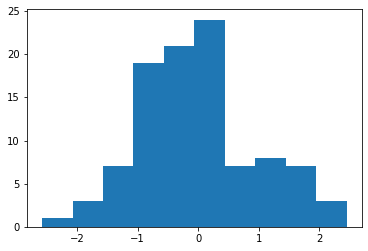

In [25]:
# answer here
import numpy as np
from numpy.random import default_rng
rng = default_rng()
sample = rng.standard_normal(100)
import matplotlib.pyplot as plt
plt.hist(sample)

C:\Users\Peter\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


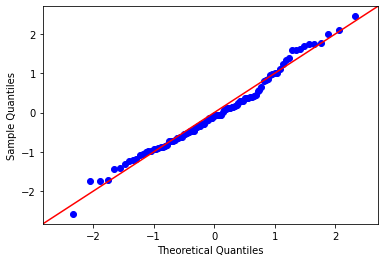

In [26]:
import statsmodels.api as sm
import pylab
sm.qqplot(sample, line = '45')
pylab.show()

The data looks relatively normally distributed, as the dots follow along with the line in general

__Q2__. Collect daily closing price stock price of Blackrock company covering the period of 2021-01-01 - 2022-01-01 (keep in mind that the date format is YYYY-MM-DD) and do the following:
*  Draw the line plot for the stock prices and interpret the stock price movement, if there is any. (10 pts)
* Calculate stock return of Blackrock in this period. (10 pts)
* What is the largest return of these companies during this period? (10 pts)
* Draw the histogram of the returns and interpret the distributions you obtained. (10 pts)
* Use QQ plot and see if the stock returns follow normal distribution. (10 pts)
* Calculate the correlation coefficient between these stock returns and interpret. (10 pts)

[*********************100%***********************]  1 of 1 completed


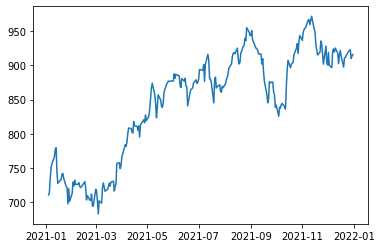

In [52]:
# answer here
import yfinance as yf
import datetime
stock = 'BLK'
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 1, 1)
SP = yf.download(stock, start = start, end = end)
SP = SP.Close
plt.plot(SP)

In [53]:
rets = np.mean(SP)

returns = np.log(SP) - np.log(SP.shift(1))
returns = returns.iloc[1:]
returns.head()

Date
2021-01-05    0.005276
2021-01-06    0.028121
2021-01-07    0.020817
2021-01-08    0.008003
2021-01-11    0.013433
Name: Close, dtype: float64

In [47]:
print(returns.max())

0.03961717752480798


(array([ 1.,  5.,  8., 27., 44., 65., 61., 24., 10.,  6.]),
 array([-0.04760459, -0.03888241, -0.03016024, -0.02143806, -0.01271588,
        -0.00399371,  0.00472847,  0.01345065,  0.02217282,  0.030895  ,
         0.03961718]),
 <BarContainer object of 10 artists>)

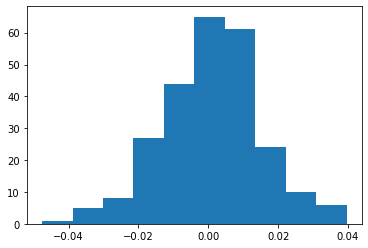

In [48]:
plt.hist(returns)
#the returns seem to be relatively normally distributed, although slightly negatively skewed

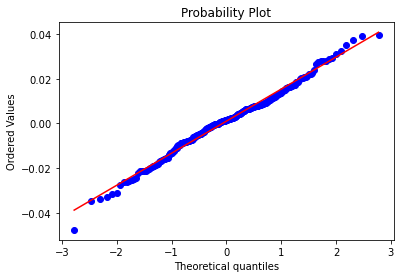

In [51]:
from scipy import stats
stats.probplot(returns, plot=plt);

__Q3__. Given the mean return and standard deviation of Blackrock stock prices, calculate the confidence interval for return mean.(20 pts)

**Hint:** Use z-table for the critical value and justify why you are using z-table.

In [60]:
# answer here
mean = returns.mean()
std = np.std(returns)
#assuming 95% CI, z score of 1.96. The z table allows you to easily determine a z score for the given confidence interval and degrees of freedom
CI = (1.96 * std)/len(returns)
print('At the 95% CI, we have ' + str(mean) + " +/-", str(CI))

At the 95% CI, we have 0.0010084328835029976 +/- 0.00011138103328570419


__Important Note__: Interpretation is an indispensable part of your work. Please do not type the code and move forward. Sometimes, an inspritational interpretation can be life-saver:)